In [39]:
#First we import the required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Then we read the csv file using pandas storing it as a dataframe
df = pd.read_csv("C:/Users/MUNNA/Downloads/netflix_titles.csv")
df

#The below is the raw dataset which consits of NULL values and may be in inconsistent format and also may consist duplicates. Lets check for that one by one

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [41]:
#The below code gives the column name, non-null counts and the datatype of the each columns, giving us a very good picture about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [42]:
#From the above output we can see that there are NULL values. Lets get the exact number by performing the following operation
new_data= df.isnull().sum()
print(new_data)

#As you can see below it gave the exact number of NULL values in each column
#However if do not want to see individual column NULL counts we can just use the below code to sum all the NULL counts
#new_data= df.isnull().sum().sum()
#But i prefer the first method because it gives a clear picture and we can work on deciding what to replace the NULL values with.

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [43]:
#In the dataset i decided not to include the cast and the description because they are not required for the analysis.
#However the description will be of use while creating a tableau dashboard so we will include it then
new_df =df.drop(['cast', 'description'], axis = 1)
new_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,NaN,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,NaN,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,Fernando Lebrija,United States,"September 8, 2017",2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,NaN,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,2016,NaN,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


HANDLING NULL VALUES

In [44]:
#I am going to replace the NULL values in 'director; column with unknowns
new_df['director'].fillna('Unknown', inplace = True)
new_df

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_10800\288588042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['director'].fillna('Unknown', inplace = True)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,Unknown,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,Fernando Lebrija,United States,"September 8, 2017",2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,Unknown,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,NaN,NaN,2016,NaN,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [45]:
#Now i just want to see it worked. (YAY,  IT DID WORK)
#Lets move forward with hadling the other NULL values
new_df.isnull().sum()

show_id           0
type              0
title             0
director          0
country         476
date_added       11
release_year      0
rating           10
duration          0
listed_in         0
dtype: int64

In [ ]:
#But as you can see i am getting a warning message while handling the NULL values for 'director'. 
#So lets make a slight difference to not get that warning message
new_df['director'] = new_df['director'].fillna('Unknown')
new_df['country'] = new_df['country'].fillna('Unknown')
new_df['rating']= new_df['rating'].fillna('Unknown')

In [47]:
#All the columns aboe were of string datatype. But the date column needs special treatment.
#For this dataset we are going to replace the NULL values with the mode
new_df['date_added']= new_df['date_added'].mode()[0]

Now lets check if there are any NULL values

In [48]:
new_df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
We are successfull in handling the NULL values with appropriate methods

In [49]:
#As you can see in the below output, the 'date_added' is in a inconsistent datatype, lets treat that accordingly.
new_df.dtypes

show_id          int64
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [50]:
#We convert the datatype of 'date_added' in the following code
new_df['date_added'] = pd.to_datetime(new_df['date_added'].str.strip(), errors='coerce')

#I tried to convert the datatype with the following code at first
#new_df['date_added'] = pd.to_datetime(new_df['date_added']
#But i was getting errors like " September 9 2019" is not in the right format to convert it into a 'datetime' format.
#That was because there was a space before september.
#Hence i found out that by executing the first code we can avoid getting errors and also treat the values accordingly.

Now lets check if there are any duplicates

In [51]:
new_df.duplicated().sum()

0

In [52]:
#Hence the final preprocessed dataset looks like: 
new_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2020-01-01,2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,United Kingdom,2020-01-01,2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,Unknown,United States,2020-01-01,2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,United States,2020-01-01,2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,Fernando Lebrija,United States,2020-01-01,2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown,United States,2020-01-01,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,70286564,TV Show,Maron,Unknown,United States,2020-01-01,2016,TV-MA,4 Seasons,TV Comedies
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,Unknown,2020-01-01,2016,Unknown,60 min,Movies
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,United Kingdom,2020-01-01,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [ ]:
CONCLUSION
We checked if there is any NULL or NaN. And we handled the NULL values accordingly.
We checked for duplicates and since there were none we did not take any action. Just to make sure i checked in excel as well and there are no duplicates.
We also tried to see if any columns are not important and did drop the uneccessary columns.

Next step is:
EXPLORARTORY DATA ANALYSIS (EDA) using codes and Visualizations

In [55]:
#1. Content Type Distribution (Movies vs. TV Shows)
# Count the number of Movies and TV Shows

type_counts = df['type'].value_counts()
type_counts

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

In [22]:
#2. Most Common Genres

new_df['genres'] = new_df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(new_df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(20)
all_genres
genre_counts

 International Movies       1842
Dramas                      1077
Comedies                     803
Documentaries                644
Action & Adventure           597
International TV Shows       570
 Dramas                      546
 TV Dramas                   543
 Independent Movies          534
 International TV Shows      431
 Romantic Movies             374
Children & Family Movies     358
 Thrillers                   352
 TV Comedies                 347
 Comedies                    310
Crime TV Shows               309
Kids' TV                     288
Stand-Up Comedy              273
 Romantic TV Shows           257
 Music & Musicals            231
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2065c7123c0>,
 [Text(-0.6014719407703795, 0.9209948449724967, 'Movie'),
  Text(0.6014718545406157, -0.9209949012863603, 'TVShow')],
 [Text(-0.32807560405657055, 0.5023608245304527, '68%'),
  Text(0.328075557022154, -0.5023608552471055, '32%')])

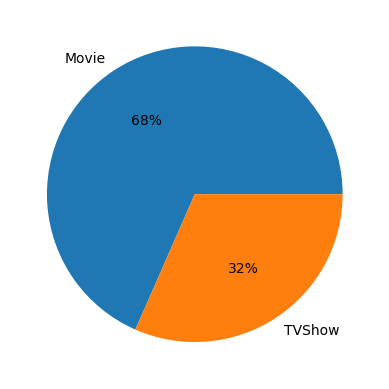

In [21]:
# A Pie chart representing the percentage of Movies and TV Shows
freq=new_df['type'].value_counts()
plt.pie(freq,labels=['Movie','TVShow'],autopct='%.0f%%')

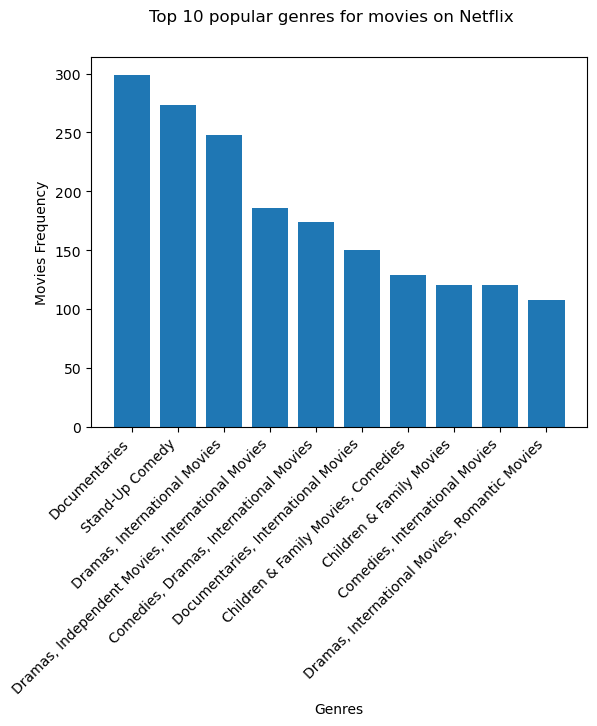

In [23]:
#Top 10 popular genres for movies on Netflix

popular_movie_genre=new_df[new_df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

C:\Users\MUNNA\AppData\Local\Temp\ipykernel_10800\1360566353.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['genres'] = tv_shows['listed_in'].str.split(', ')


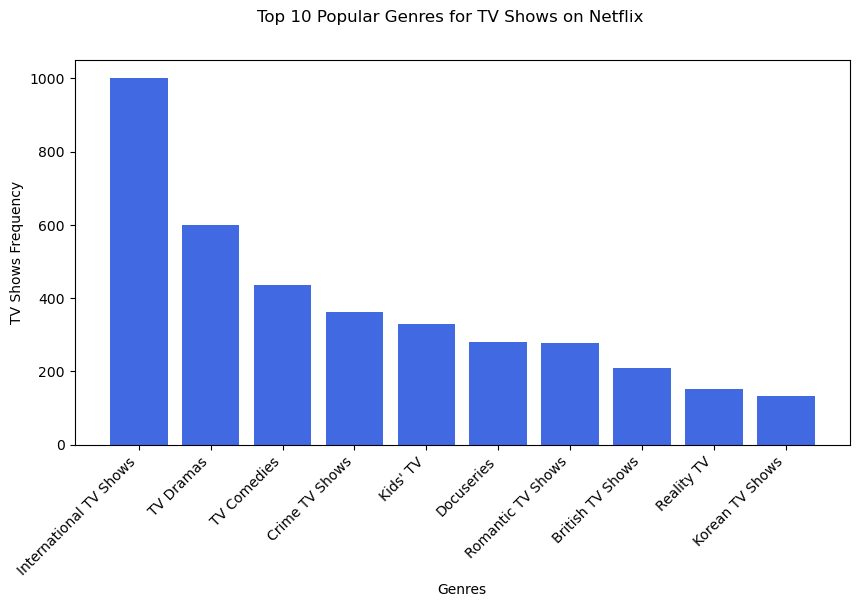

In [24]:
#Top 10 TV Shows genres

tv_shows = new_df[new_df['type'] == 'TV Show']
tv_shows['genres'] = tv_shows['listed_in'].str.split(', ')
all_tv_genres = sum(tv_shows['genres'], [])
genre_counts = pd.Series(all_tv_genres).value_counts().head(10)

#Plotting the bar chart
plt.figure(figsize=(10, 5))  # Adjust figure size for better visibility
plt.bar(genre_counts.index, genre_counts.values, color='royalblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 Popular Genres for TV Shows on Netflix")
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Raúl Campos, Jan Suter'),
  Text(1, 0, 'Marcus Raboy'),
  Text(2, 0, 'Jay Karas'),
  Text(3, 0, 'Jay Chapman'),
  Text(4, 0, 'Steven Spielberg'),
  Text(5, 0, 'Martin Scorsese'),
  Text(6, 0, 'David Dhawan'),
  Text(7, 0, 'Lance Bangs'),
  Text(8, 0, 'Johnnie To'),
  Text(9, 0, 'Hakan Algül'),
  Text(10, 0, 'Quentin Tarantino'),
  Text(11, 0, 'Cathy Garcia-Molina'),
  Text(12, 0, 'S.S. Rajamouli'),
  Text(13, 0, 'Shannon Hartman')])

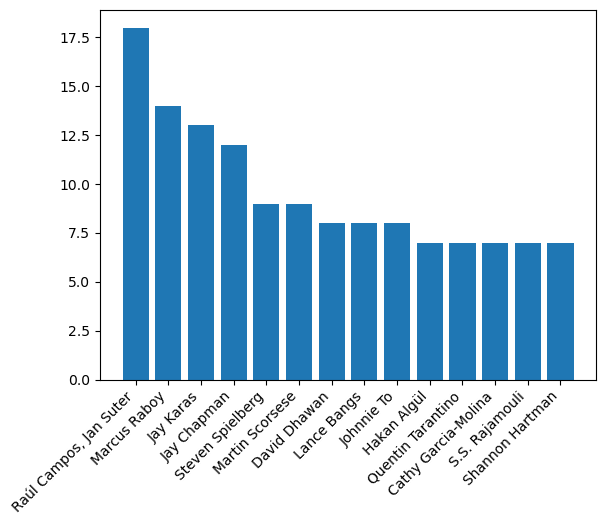

In [57]:
#Top 15 directors across Netflix with high frequency of movies and shows.

directors=new_df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')

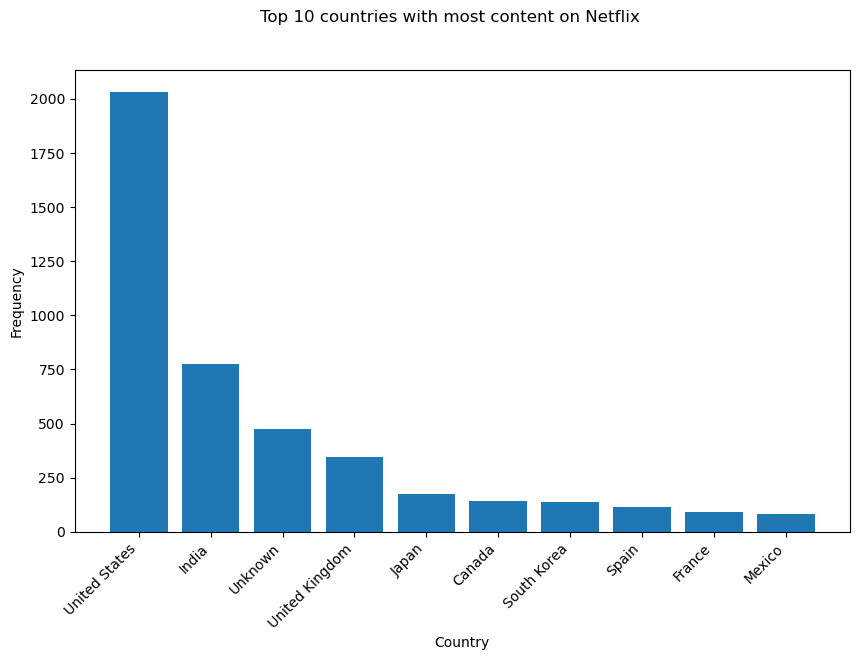

In [56]:
#Top 10 countries with most content on Netflix

top_ten_countries=new_df['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.bar(top_ten_countries['country'],
top_ten_countries['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

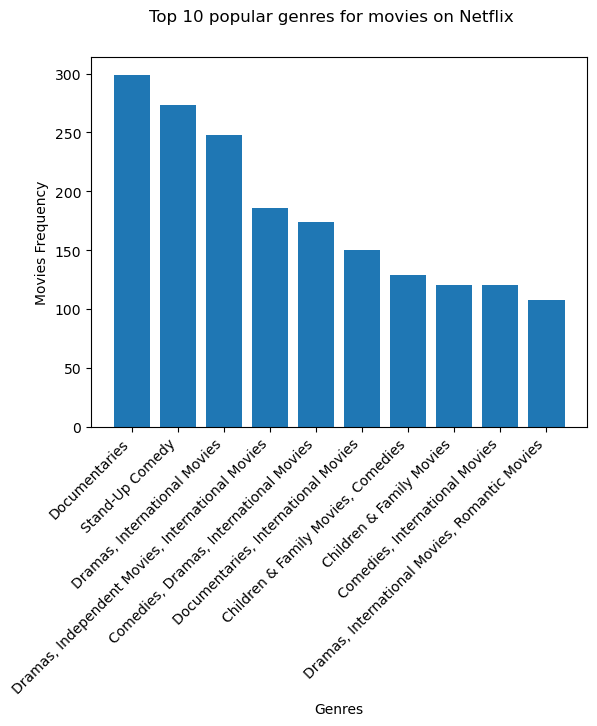

In [54]:
#Top 10 popular genres for movies on Netflix

popular_movie_genre=new_df[new_df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=new_df[new_df['type']=='TVShow'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()


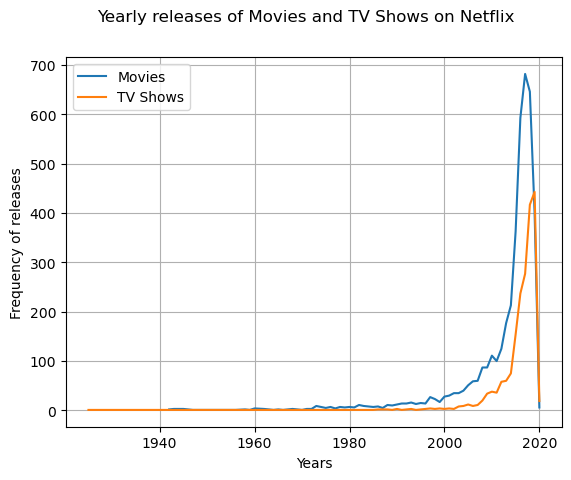

In [53]:
#Yearly releases of Movies and TV Shows onNetflix

yearly_movie_releases=df[df['type']=='Movie']['release_year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['release_year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

In [ ]:
AND HENCE WE COME TO THE END OF OUR JUPYTER NOTEBOOK ANALYSIS.